# Logistic Map

## Code the Logistic Map

Write a function that returns a N
steps long trajectory of a logistic map given an initial condition x0 and parameter value r, where 1 < r < 4.

In [1]:
using Plots

In [2]:
logistic(x; r=2) = r*x*(1-x)
logistic(; r=2) = x -> logistic(x; r=r)

logistic (generic function with 2 methods)

In [3]:
function logistic_trajectory(xo::T; N=100, r=2) where {T}
    xs = Vector{T}(undef, N)
    logi = logistic(; r=r)

    xs[1] = logi(xo)
    for i in 2:N
        xs[i] = logi(xs[i-1])
    end
    return xs
end

logistic_trajectory (generic function with 1 method)


## Plot trajectories

Julia has one major plotting library Plots.jl that can use different backends for plotting (like Python's matplotlib or plotly). After importing the library with using Plots, a basic plot is called by plot(x,y). If you want to add to an exisiting plot, use plot!(x,y). You can adjust the plot by adding keyword arguments. Some common keyword arguments are:

    ylims=[lower_limit, upper_limit]
    xlims=[lower_limit, upper_limit]
    title
    xlabel
    ylabel
    all further keyword arguments are listed there: https://docs.juliaplots.org/stable/attributes/

For those how are familiar with Python, you can also use matplotlib.pyplot directly, there is a Julia wrapper, called PyPlot.jl. The syntax is almost the same as in Python. See its documentation (https://github.com/JuliaPy/PyPlot.jl) for how exactly it translates.

Now, plot trajectories of the logistic map for different values of 1 < r < 4, that are N=50 steps long.

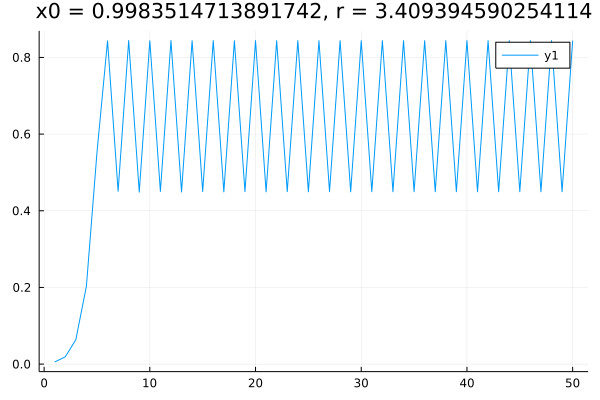

In [10]:
N = 50
r = 3 * rand() + 1
x0 = rand()
plot(1:N, logistic_trajectory(x0; N=N, r=r), title="x0 = $x0, r = $r")


## Plotting a famous diagram

Plot a diagram with r
on the x axis and the last 50 points of 100 steps long trajectories of a logistic map on the y axis for 2.5 < r < 4. Use the same initial conditions x0

for every trajectory.
Tips

    use scatter! For the plots. The keyword argument markersize determines the size of the scatter points, it should be <1

here
If you use any plot inside of a loop, use the show=true argument so that your editor really shows the plot

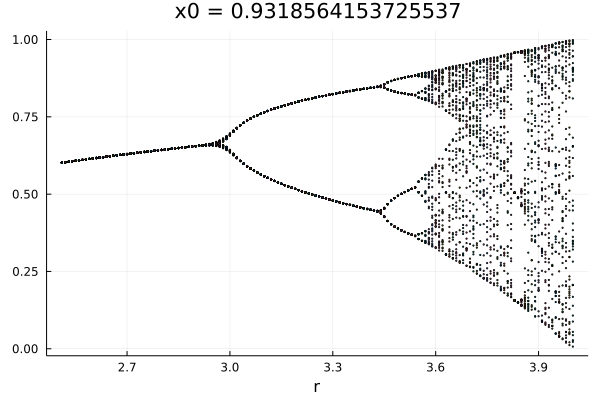

In [17]:
rs = 2.51 : 0.01 : 4
N = 50
x0 = rand()
p = plot(title="x0 = $x0", xlabel="r")

for r in rs
    xs = logistic_trajectory(x0; N=2*N, r=r)
    scatter!(p, fill(r, N), xs[N+1:2*N], markersize=0.8, legend=false)
end
p